In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [9]:
# Load CSV data
data = pd.read_csv('/content/tips (data for regression problem).csv')

In [10]:
# Data Analysis and Visualization
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot: Total Bill vs Tip')

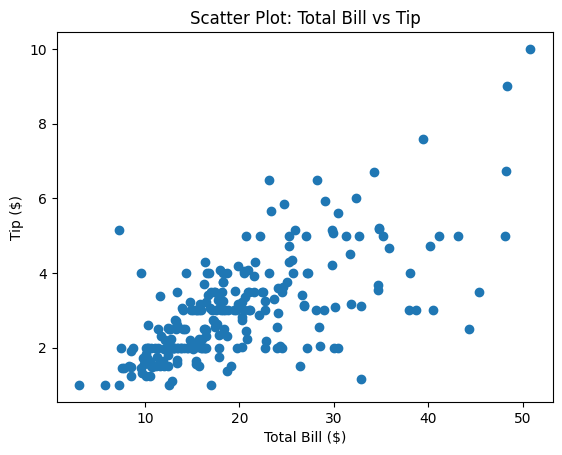

In [15]:
# 1. Scatter Plot: Total Bill vs Tip
plt.scatter(data['total_bill'], data['tip'])
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Scatter Plot: Total Bill vs Tip')

Text(0.5, 1.0, 'Pair Plot for Numeric Features')

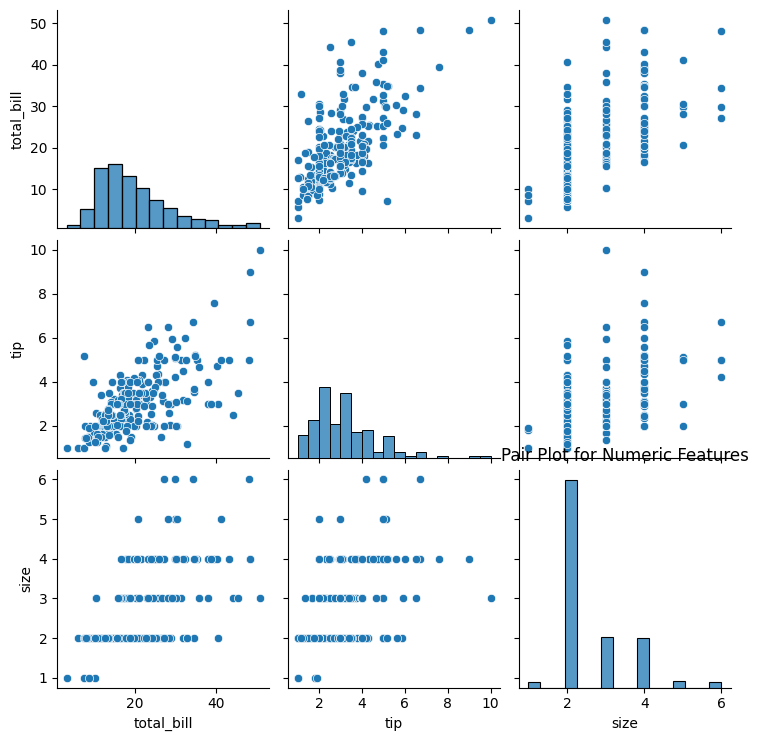

In [12]:
 #2. Pair Plot
numeric_cols = ['total_bill', 'tip', 'size']
sns.pairplot(data[numeric_cols])
plt.title('Pair Plot for Numeric Features')

In [13]:
# 3. Correlation Analysis
# Convert categorical variables to numeric
categorical_cols = ['sex', 'smoker', 'day', 'time']
data_encoded = data.copy()
le = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data[col])

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

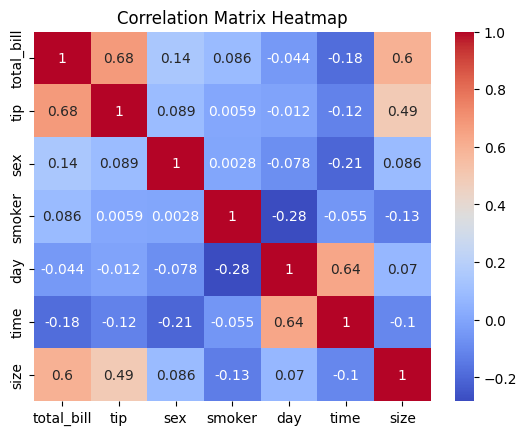

In [16]:
# Correlation Matrix
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [17]:
# 4. Residuals Plot
X = data['total_bill'].values.reshape(-1, 1)
y = data['tip'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

Text(0.5, 1.0, 'Residuals Plot')

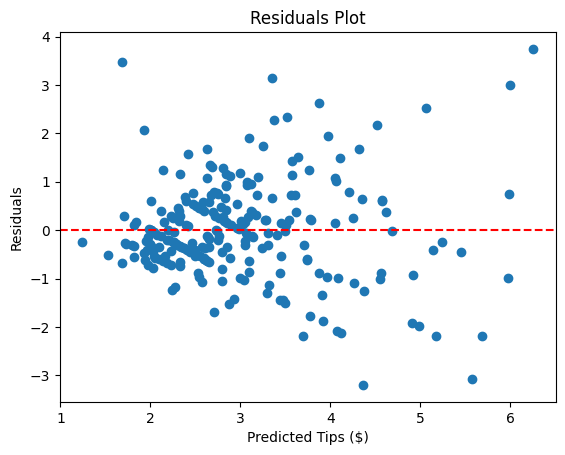

In [18]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tips ($)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

Text(0.5, 1.0, 'Time Series of Tips')

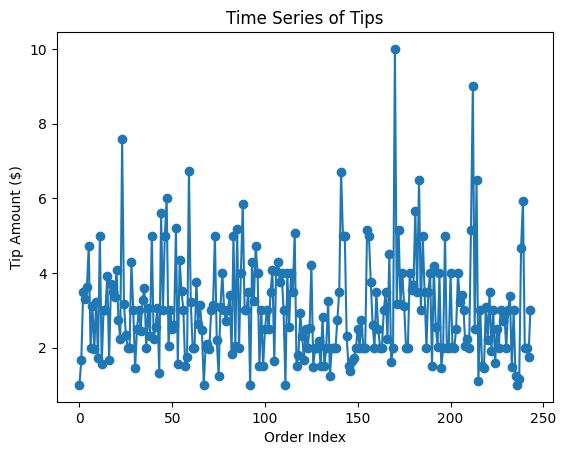

In [19]:
# 5. Time Series Plot
plt.plot(range(len(data)), data['tip'], marker='o')
plt.xlabel('Order Index')
plt.ylabel('Tip Amount ($)')
plt.title('Time Series of Tips')

In [20]:
# Rainbow Test for Linearity
def rainbow_test(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rainbow_statistic, rainbow_p_value = sm.stats.diagnostic.linear_rainbow(model)
    return rainbow_statistic, rainbow_p_value


In [21]:
X = data_encoded.drop(['tip'], axis=1)
y = data_encoded['tip']

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=3)
}

In [25]:
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2')

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std()
    }

In [26]:
# Feature importance analysis using Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

In [27]:
print("\n=== Model Performance Results ===")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2']:.4f}")
    print(f"Cross-validation R2 (mean ± std): {metrics['CV_R2_Mean']:.4f} ± {metrics['CV_R2_Std']:.4f}")

print("\n=== Feature Importance ===")
print(feature_importance)


=== Model Performance Results ===

Linear Regression:
MSE: 0.6948
R2 Score: 0.4441
Cross-validation R2 (mean ± std): 0.3383 ± 0.1894

Ridge:
MSE: 0.6938
R2 Score: 0.4449
Cross-validation R2 (mean ± std): 0.3399 ± 0.1875

Lasso:
MSE: 1.4487
R2 Score: -0.1590
Cross-validation R2 (mean ± std): 0.0259 ± 0.0384

Decision Tree:
MSE: 1.4134
R2 Score: -0.1308
Cross-validation R2 (mean ± std): -0.1748 ± 0.5519

Random Forest:
MSE: 0.9621
R2 Score: 0.2303
Cross-validation R2 (mean ± std): 0.3533 ± 0.1798

SVR:
MSE: 0.7177
R2 Score: 0.4259
Cross-validation R2 (mean ± std): 0.3599 ± 0.0580

KNN:
MSE: 1.0848
R2 Score: 0.1322
Cross-validation R2 (mean ± std): 0.2312 ± 0.1259

=== Feature Importance ===
      Feature  Importance
0  total_bill    0.768877
2      smoker    0.070987
3         day    0.060513
5        size    0.059022
1         sex    0.026900
4        time    0.013701


In [28]:
rainbow_stat, rainbow_p = rainbow_test(X['total_bill'].values.reshape(-1, 1), y)
print(f"\n=== Rainbow Test Results ===")
print(f"Statistic: {rainbow_stat:.4f}")
print(f"P-value: {rainbow_p:.4f}")

plt.tight_layout()
plt.show()


=== Rainbow Test Results ===
Statistic: 1.2291
P-value: 0.1291


<Figure size 640x480 with 0 Axes>

In [29]:
print("\n=== Management Insights ===")
print("\n1. Average Tips by Party Size:")
print(data.groupby('size')['tip'].agg(['mean', 'count']))


=== Management Insights ===

1. Average Tips by Party Size:
          mean  count
size                 
1     1.437500      4
2     2.582308    156
3     3.393158     38
4     4.135405     37
5     4.028000      5
6     5.225000      4


In [30]:
print("\n2. Tips by Gender:")
print(data.groupby('sex')['tip'].agg(['mean', 'count']))


2. Tips by Gender:
            mean  count
sex                    
Female  2.833448     87
Male    3.089618    157


In [31]:
print("\n3. Average Tip Percentage:")
data['tip_percentage'] = (data['tip'] / data['total_bill']) * 100
print(f"Average tip percentage: {data['tip_percentage'].mean():.2f}%")


3. Average Tip Percentage:
Average tip percentage: 16.08%


In [32]:
with open('tip_analysis_results.txt', 'w') as f:
    f.write("=== Tipping Behavior Analysis Results ===\n\n")
    f.write("1. Key Factors Influencing Tips:\n")
    f.write(feature_importance.to_string())
    f.write("\n\n2. Model Performance Summary:\n")
    for name, metrics in results.items():
        f.write(f"\n{name}:\n")
        f.write(f"R2 Score: {metrics['R2']:.4f}\n")
    f.write("\n3. Management Recommendations:\n")
    f.write("- Focus on larger party bookings\n")
    f.write("- Monitor service quality for high-bill tables\n")
    f.write("- Consider special attention to weekend dinner service\n")